# SALÁRIOS EM DATA SCIENCE

Temos um dataset que contém dados de salário na carreira de ciência de dados e mais 11 features associadas a estes profissionais.
Nosso objetivo é compreender as relações entre os diferentes atributos destes trabalhadores, especialmente no que pode definir a remuneração destes indíviduos.

# SOBRE O DATASET

Extraído de https://ai-jobs.net/.

Esta base de dados de salários em Data Science contém 11 colunas que são:

1. work_year: O ano em que o salário foi pago.

2. experience_level: O nível de experiência no cargo durante o ano reportado em que pode assumir os seguintes valores:

*   EN Entry-level / Junior
*   MI Mid-level / Intermediate
*   SE Senior-level / Expert
*   EX Executive-level / Director

3. employment_type: O tipo de contrato de trabalho.

*   PT Part-time
*   FT Full-time
*   CT Contract
*   FL Freelance

4. job_title: O cargo trabalhado durante o ano.

5. salary: O montante bruto pago no ano.

6. salary_currency: A moeda em que a remuneração foi paga com base nos códigos de moeda ISO 4217.

7. salary_in_usd: Salário em dólares americanos (USD) sendo que a taxa de câmbio utilizada foi a média para aquele ano.

8. employee_residence: Residência primária do empregado durante aquele ano. Código para país da ISO 3166.

9. remote_ratio: Quanto de trabalho é realizado de forma remota, pode assumir os seguintes valores.


*   0 - Presencial
*   50 - Parcialmente
*   100 - Totalmente Remoto

10. company_location: O país em que a matriz ou filial contratante está localizada. segue o código ISO 3166 para países.

11. company_size: Tamanho da companhia



*   S - menor que 50 pessoas (small)
*   M - de 50 a 250 empregados (médio)
*   L - mais do que 250 emnpregados (large).

# BIBLIOTECAS UTILIZADAS

In [ ]:
!pip install country_converter

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import country_converter as coco
import plotly.express as px

# **ANALISANDO OS DADOS**
---

Limpeza e estruturação dos dados

## Prévia dos dados

Chamaremos os dados e visualizamos o conjunto.

In [ ]:
df = pd.read_csv("ds_salaries.csv", sep=',', encoding='utf-8')

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
print(80*'*')
print(f'Dimensões: {df.shape[0]} linhas e {df.shape[1]} colunas.\n')
print(80*'*')
print(f'Colunas: {df.columns.values}\n')
print(80*'*')
print('Tipos:', '\n\n'+str(df.dtypes)+'\n')
print(80*'*')
print('Quantidade de valores únicos: ', '\n\n'+str(df.nunique()))
print(80*'*')
print('Prévia dos valores: \n')
for col in df.columns.values:
  if len(df[col].unique()) > 5:
    print(col+': ', df[col].unique()[:5], 'and more...')
  else:
    print(col+': ', df[col].unique())
print(80*'*')
print('Valores Nulos:', '\n\n'+str(df.isnull().sum())+'\n\n')
print(80*'*')
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]
print('Variáveis numéricas que podem ser categoricas: ', num_but_cat)
print('Variáveis categóricas com cardinalidade: ', cat_but_car)

********************************************************************************
Dimensões: 3755 linhas e 11 colunas.

********************************************************************************
Colunas: ['work_year' 'experience_level' 'employment_type' 'job_title' 'salary'
 'salary_currency' 'salary_in_usd' 'employee_residence' 'remote_ratio'
 'company_location' 'company_size']

********************************************************************************
Tipos: 

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

********************************************************************************
Quantidade de valores únicos:  

work_year                4
experience_level         4
employment_type     

In [ ]:
df[[col for col in df.columns.values if col not in num_but_cat]].describe().T

,count,mean,std,min,25%,50%,75%,max
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0


## Renomeando algumas features para facilitar a compreensão.

In [ ]:
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Intermediate level',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

print('Prévia dos valores: \n')
for col in df.columns.values:
  if col in ['experience_level', 'employment_type', 'company_size', 'remote_ratio']:
    print(col+': ', df[col].unique())

Prévia dos valores: 

experience_level:  ['Senior' 'Intermediate level' 'Entry level' 'Executive level']
employment_type:  ['Full-time' 'Contractor' 'Freelancer' 'Part-time']
remote_ratio:  ['Full-Remote' 'On-Site' 'Half-Remote']
company_size:  ['Large' 'Small' 'Medium']


Criando uma nova feature agrupando os cargos em áreas de atuação.

In [ ]:
def cat_job_title(job_title):

  data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer", "Big Data Engineer"]
  data_scientist = ["Data Analytics Manager", "Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Data Science Consultant", "Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer", "AI Scientist", "Research Engineer"]
  machine_learning = ["Head of Machine Learning","Machine Learning Scientist","Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer", "Applied Machine Learning Scientist"]
  data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]

  if job_title in data_engineering:
      return "Data Engineering"
  elif job_title in data_scientist:
      return "Data Science"
  elif job_title in machine_learning:
      return "Machine Learning"
  elif job_title in data_architecture:
      return "Data Architecture"
  else:
      return "Other"

#aplicando categorização em todos os cargos.
df['job_category'] = df['job_title'].apply(cat_job_title)

print('Quantidade de categorias para cargos: ',df['job_category'].nunique())

Quantidade de categorias para cargos:  5


## Sumário dos dados

A base de dados consiste em 3755 linhas com 11 colunas.

A variável target é *salary_in_usd*.

Temos 6 variáveis categóricas e 2 numéricas.

Não há valores missing na base, o que não significa dados inválidos.

*work_year* é uma varíavel categórica.

Existem 3 variáveis categóricas com cardinalidade.

Estatística descritiva para salary indica que há outliers.

# ANÁLISE UNIVARIADA

## CATEGÓRICAS

### Ano Base

In [ ]:
df['work_year'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

2023    47.5%
2022    44.3%
2021     6.1%
2020     2.0%
Name: work_year, dtype: object

In [ ]:
print(f"Maior volume de dados foi obtido em 2 anos, {df['work_year'].value_counts(normalize=True).index[:2].values} com {df['work_year'].value_counts(normalize=True)[:2].mul(100).round(0).sum().astype(str) + '%'} da base de dados.")

Maior volume de dados foi obtido em 2 anos, [2023 2022] com 92.0% da base de dados.


### Categoria

In [ ]:
df['job_category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Data Engineering     48.6%
Data Science         31.0%
Machine Learning      9.7%
Other                 7.9%
Data Architecture     2.8%
Name: job_category, dtype: object

In [ ]:
print(f"Concentração em 3 categorias que representam {df['job_category'].value_counts(normalize=True)[:3].mul(100).round(0).sum().astype(str) + '%'} da base de dados.")

Concentração em 3 categorias que representam 90.0% da base de dados.


### Cargos

In [ ]:
print('Cargos diferentes na companhia:', len(set(df['job_title'])))

Cargos diferentes na companhia: 93


In [ ]:
df['job_title'].value_counts(normalize=True)[:10].mul(100).round(1).astype(str) + '%'

Data Engineer                27.7%
Data Scientist               22.4%
Data Analyst                 16.3%
Machine Learning Engineer     7.7%
Analytics Engineer            2.7%
Data Architect                2.7%
Research Scientist            2.2%
Data Science Manager          1.5%
Applied Scientist             1.5%
Research Engineer             1.0%
Name: job_title, dtype: object

In [ ]:
print(f"Os top 10 cargos representam {df['job_title'].value_counts(normalize=True)[:10].mul(100).round(0).sum().astype(str) + '%'} da base de dados.")

Os top 10 cargos representam 87.0% da base de dados.


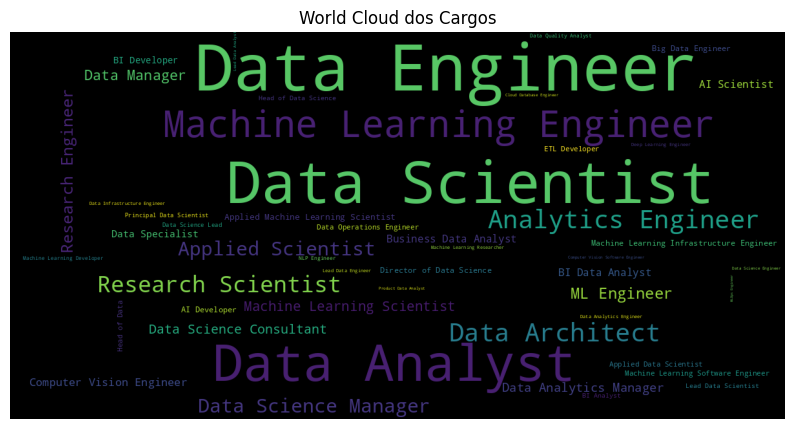

In [ ]:
plt.figure(figsize = (10,8))
wc = WordCloud(width = 1200, height = 600, max_words = 50,
            background_color = 'black',
            max_font_size = 100, random_state = 42)
wc.generate_from_frequencies(df['job_title'].value_counts())

plt.imshow(wc)
plt.title('World Cloud dos Cargos')
plt.axis('off')
plt.show()

### Experiência

In [ ]:
df['experience_level'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Senior                67.0%
Intermediate level    21.4%
Entry level            8.5%
Executive level        3.0%
Name: experience_level, dtype: object

### Contrato de Trabalho

In [ ]:
df['employment_type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Full-time     99.0%
Part-time      0.5%
Contractor     0.3%
Freelancer     0.3%
Name: employment_type, dtype: object

### Porte das Empregadoras

In [ ]:
df['company_size'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Medium    84.0%
Large     12.1%
Small      3.9%
Name: company_size, dtype: object

### Proporção de Trabalho Remoto

In [ ]:
df['remote_ratio'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

On-Site        51.2%
Full-Remote    43.8%
Half-Remote     5.0%
Name: remote_ratio, dtype: object

## GEOESPACIAL

### Residência dos Profissionais

In [ ]:
df['employee_residence'].value_counts(normalize=True)[:20].mul(100).round(1).astype(str) + '%'

US    80.0%
GB     4.4%
CA     2.3%
ES     2.1%
IN     1.9%
DE     1.3%
FR     1.0%
PT     0.5%
BR     0.5%
GR     0.4%
NL     0.4%
AU     0.3%
MX     0.3%
IT     0.2%
PK     0.2%
JP     0.2%
IE     0.2%
NG     0.2%
AT     0.2%
AR     0.2%
Name: employee_residence, dtype: object

In [ ]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence_code'] = country
residence = df['employee_residence_code'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Residência dos Profissionais', width=800, height=600)
fig.show()

### Localização dos Empregadores

In [ ]:
df['company_location'].value_counts(normalize=True)[:20].mul(100).round(1).astype(str) + '%'

US    81.0%
GB     4.6%
CA     2.3%
ES     2.1%
IN     1.5%
DE     1.5%
FR     0.9%
BR     0.4%
AU     0.4%
GR     0.4%
PT     0.4%
NL     0.3%
MX     0.3%
IE     0.2%
SG     0.2%
AT     0.2%
JP     0.2%
TR     0.1%
CH     0.1%
NG     0.1%
Name: company_location, dtype: object

In [ ]:
country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location_code'] = country
residence = df['company_location_code'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Residência dos Profissionais', width=800, height=600)
fig.show()

### Moeda dos Salários

In [ ]:
df['salary_currency'].value_counts(normalize=True)[:10].mul(100).round(1).astype(str) + '%'

USD    85.9%
EUR     6.3%
GBP     4.3%
INR     1.6%
CAD     0.7%
AUD     0.2%
SGD     0.2%
BRL     0.2%
PLN     0.1%
CHF     0.1%
Name: salary_currency, dtype: object

## TARGET

### Salário em USD

In [ ]:
df['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

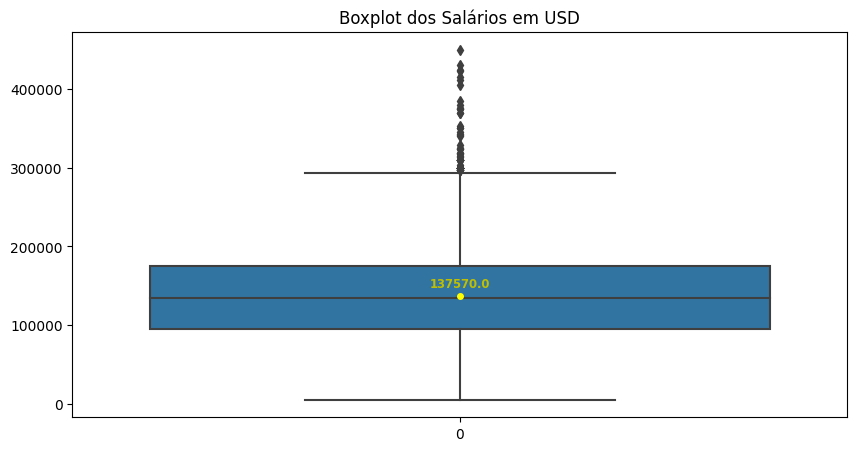

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(df['salary_in_usd'], orient='v',showmeans=True,
                 meanprops={
                      "marker":"o",
                      "markerfacecolor":"yellow",
                      "markeredgecolor":"yellow",
                      "markersize":"4"
                      }).set_title('Boxplot dos Salários em USD')

means = df['salary_in_usd'].mean()
median = df['salary_in_usd'].median()

for xtick in ax.get_xticks():
  ax.text(xtick,median+median*0.1,round(means,0), horizontalalignment='center',size='small',color='y',weight='bold')

plt.show()

<Axes: ylabel='salary_in_usd'>

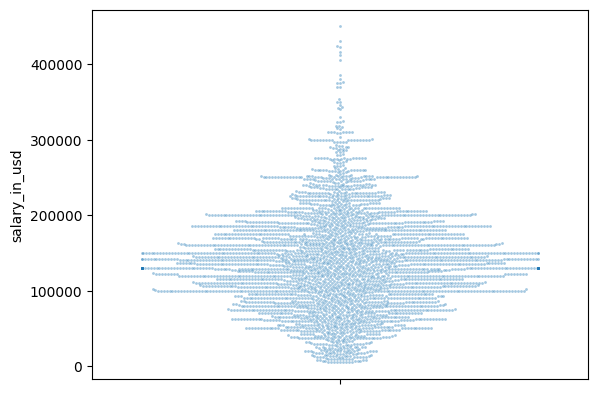

In [ ]:
sns.swarmplot(y=df['salary_in_usd'], orient='v', alpha=0.4, size=2)

Text(0.5, 1.0, 'Distribuição das Frequências dos Salários em USD')

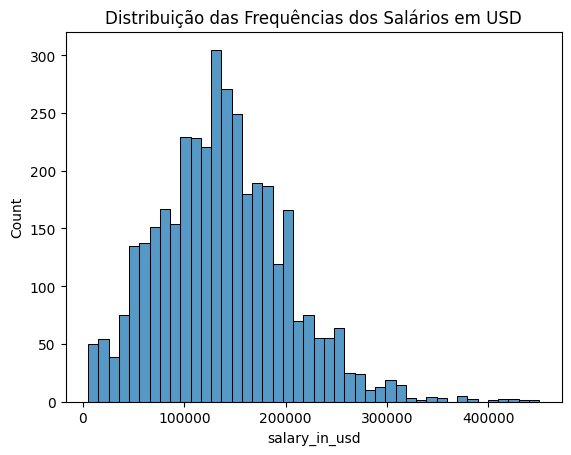

In [ ]:
sns.histplot(df['salary_in_usd']).set_title('Distribuição das Frequências dos Salários em USD')

### Outliers

In [ ]:
# Normal
df_outliers = df.copy()
df_outliers['z'] = (df_outliers['salary_in_usd'] - np.mean(df_outliers['salary_in_usd']))/np.std(df_outliers['salary_in_usd'] )
df_outliers = df_outliers[(df_outliers['z'] <= -3) | (df_outliers['z']  >= 3)].copy().reset_index(drop=True).sort_values(by='salary_in_usd', ascending=False)
print(f"{df_outliers.shape[0]} registros com salários outliers. \nMenor outlier: {df_outliers['salary_in_usd'].tail(1).values} \nMaior outlier: {df_outliers['salary_in_usd'].head(1).values} \nPara média {df['salary_in_usd'].mean()} e desvio padrão {df['salary_in_usd'].std()}")
df_no_outliers = df.copy()
df_no_outliers['z'] = (df_no_outliers['salary_in_usd'] - np.mean(df_no_outliers['salary_in_usd']))/np.std(df_no_outliers['salary_in_usd'] )
df_no_outliers = df_no_outliers[~((df_no_outliers['z'] <= -3) | (df_no_outliers['z']  >= 3))].copy().sort_values(by='salary_in_usd', ascending=False)
no_outliers_mean = df_no_outliers['salary_in_usd'].mean()
no_outliers_std = df_no_outliers['salary_in_usd'].std()
print(f"\n\n{df_no_outliers.shape[0]} registros sem salários outliers. \nMenor salário: {df_no_outliers['salary_in_usd'].tail(1).values} \nMaior salário: {df_no_outliers['salary_in_usd'].head(1).values} \nPara média {no_outliers_mean} e desvio padrão {no_outliers_std}")

22 registros com salários outliers. 
Menor outlier: [329500] 
Maior outlier: [450000] 
Para média 137570.38988015978 e desvio padrão 63055.6252782241


3733 registros sem salários outliers. 
Menor salário: [5132] 
Maior salário: [325000] 
Para média 136145.5995178141 e desvio padrão 60383.19065139158


Cargos executivos envolvem remuneração maior, este seria um determinante?

In [ ]:
df_outliers['experience_level'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Senior                68.2%
Intermediate level    18.2%
Executive level       13.6%
Name: experience_level, dtype: object

Alguma categoria específica?

In [ ]:
df_outliers['job_category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Data Science         40.9%
Other                31.8%
Data Engineering      9.1%
Machine Learning      9.1%
Data Architecture     9.1%
Name: job_category, dtype: object

Algum cargo em especial?

In [ ]:
df_outliers['job_title'].value_counts(normalize=True)[:10].mul(100).round(1).astype(str) + '%'

Research Scientist                    13.6%
Data Scientist                        13.6%
Data Analyst                           9.1%
Data Architect                         9.1%
AI Scientist                           4.5%
Applied Machine Learning Scientist     4.5%
Principal Data Scientist               4.5%
Data Analytics Lead                    4.5%
Applied Data Scientist                 4.5%
Machine Learning Software Engineer     4.5%
Name: job_title, dtype: object

Algum ano atípico?

In [ ]:
df_outliers['work_year'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

2023    50.0%
2022    31.8%
2020     9.1%
2021     9.1%
Name: work_year, dtype: object

Contratos excepcionais?

In [ ]:
df_outliers['employment_type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Full-time     95.5%
Contractor     4.5%
Name: employment_type, dtype: object

Porte da empresa é determinante?

In [ ]:
df_outliers['company_size'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Medium    59.1%
Large     36.4%
Small      4.5%
Name: company_size, dtype: object

Trabalho remoto?

In [ ]:
df_outliers['remote_ratio'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

On-Site        54.5%
Full-Remote    36.4%
Half-Remote     9.1%
Name: remote_ratio, dtype: object

# INSIGHTS

As varíaveis **categóricas** possuem concentração em determinados tipos, sendo eles:

*   **Ano Base**: 2022 e 2023 representam 92% dos registros.
*   **Categoria**: Data Engineering, Data Science e Machine Learning somam 87% dos profissionais.
*   **Experiência**: 67% tem nível d experiência "senior".
*  **Cargos**: Os cargos mais comuns são Data Engineer, Data Scientist e Data Analyst são 66% da base.
*   **Contrato**: 99% possuem Full-Time.
*   **Porte da Cia**: 82% são médias.
*   **Trabalho Remoto** : Somente 5% fazem semi-presencial, 51.2% presencial e 43.9% totalmente remotos.


Com relação a **localização** de empregados e empregadoras, a maior parte (~80%) se concentram nos EUA bem como recebem em USD.


A variável **target** possui 22 outliers considerando o método Z-Score para detecção e apresenta o seguinte:

*   22 registros com salários outliers.
Menor outlier: 329500
Maior outlier: 450000
Para média 137570 e desvio padrão 63055
*   3733 registros sem salários outliers.
Menor salário: 5132
Maior salário: 325000
Para média 136145 e desvio padrão 60383

A existência de outliers em pouca quantidade de registros não impacta a média ou variância da amostra de forma significativa, também não foram encontrados determinantes para estes salários outliers.












# ANÁLISE BIVARIADA

## Qual a CATEGORIA com maior média SALARIAL?

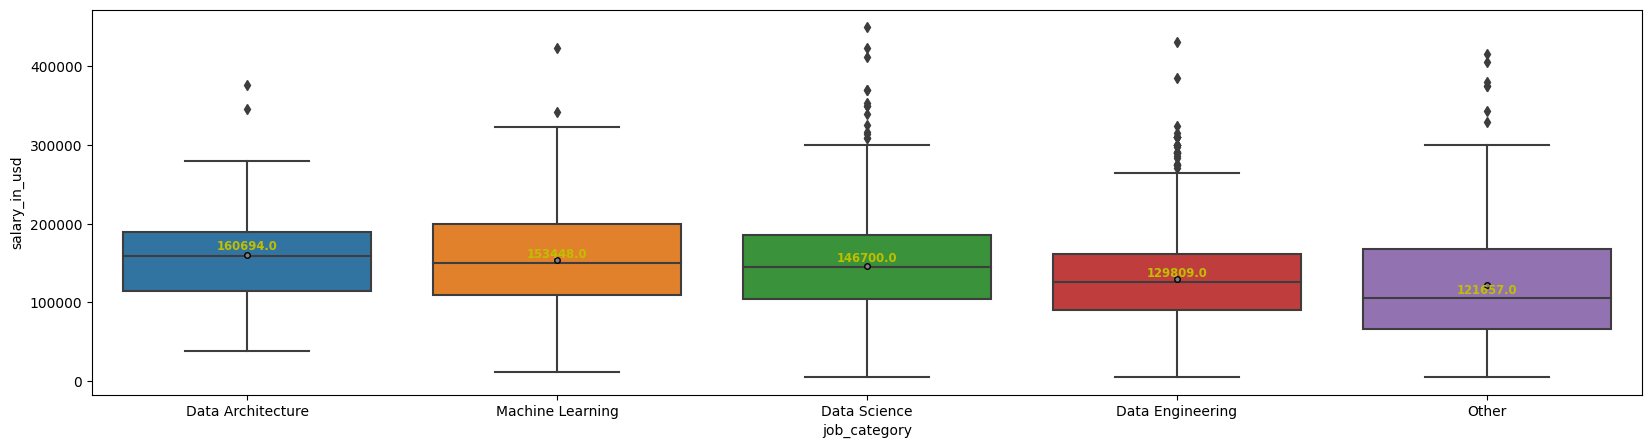

In [ ]:
feature = 'salary_in_usd'
feature2 = 'job_category'

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(
    data=df, x=feature2, y=feature, order=df.groupby(feature2)[feature].agg('mean').sort_values(ascending=False).index,showmeans=True,
                 meanprops={
                      "marker":"o",
                      "markerfacecolor":"gray",
                      "markeredgecolor":"black",
                      "markersize":"4"
                      })

means = df.groupby(feature2)[feature].agg('mean').sort_values(ascending=False)
median = df.groupby(feature2)[feature].agg('median').sort_values(ascending=False)

for xtick in ax.get_xticks():
    ax.text(xtick,median[xtick]+(median[xtick]*0.05),round(means[xtick],0),
            horizontalalignment='center',size='small',color='y',weight='bold')

plt.show()

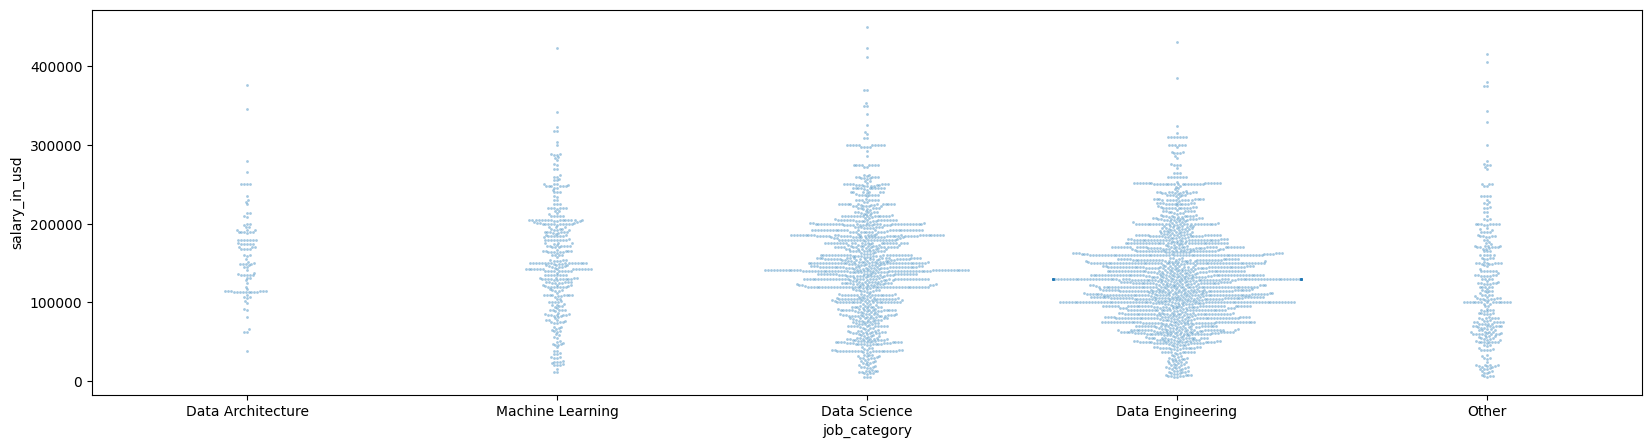

In [ ]:
feature = 'salary_in_usd'
feature2 = 'job_category'

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.swarmplot(data=df, x=feature2, y=feature, order=df.groupby(feature2)[feature].agg('mean').sort_values(ascending=False).index, alpha=0.4, size=2)
plt.show()

## Como é a progressão SALARIAL entre os níveis de EXPERIÊNCIA?

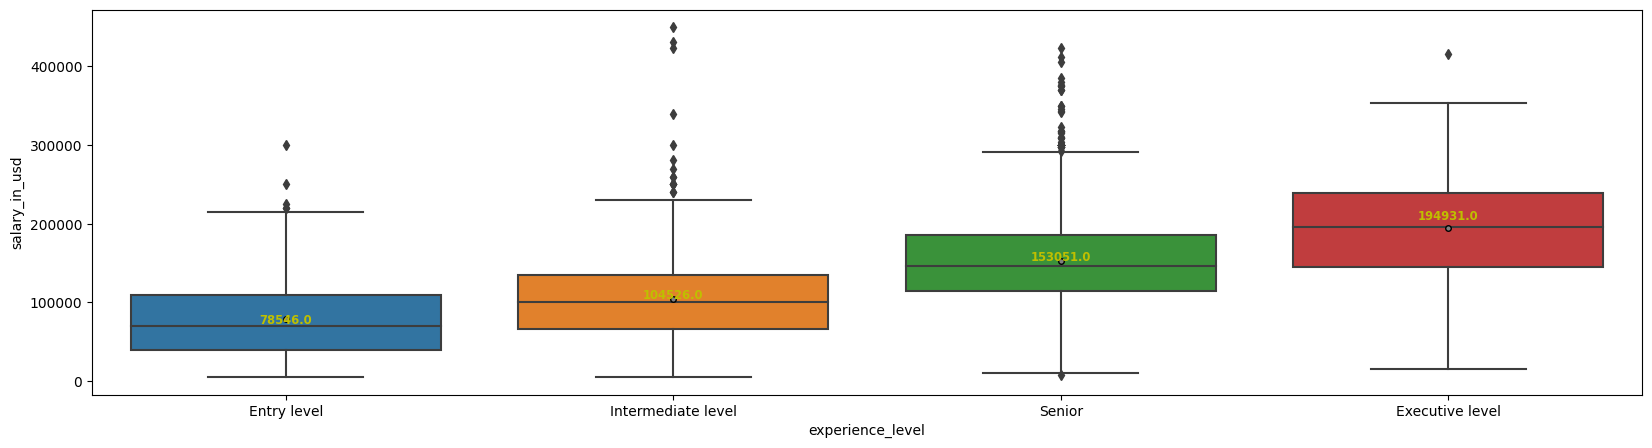

In [ ]:
feature = 'salary_in_usd'
feature2 = 'experience_level'

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(data=df, x=feature2, y=feature, order=df.groupby(feature2)[feature].agg('mean').sort_values(ascending=True).index,showmeans=True,
                 meanprops={
                      "marker":"o",
                      "markerfacecolor":"gray",
                      "markeredgecolor":"black",
                      "markersize":"4"
                      })
means = df.groupby(feature2)[feature].agg('mean').sort_values(ascending=True)
median = df.groupby(feature2)[feature].agg('median').sort_values(ascending=True)

for xtick in ax.get_xticks():
    ax.text(xtick,median[xtick]+(median[xtick]*0.05),round(means[xtick],0),
            horizontalalignment='center',size='small',color='y',weight='bold')
plt.show()

## Como é a progressão SALARIAL entre as CATEGORIAS?

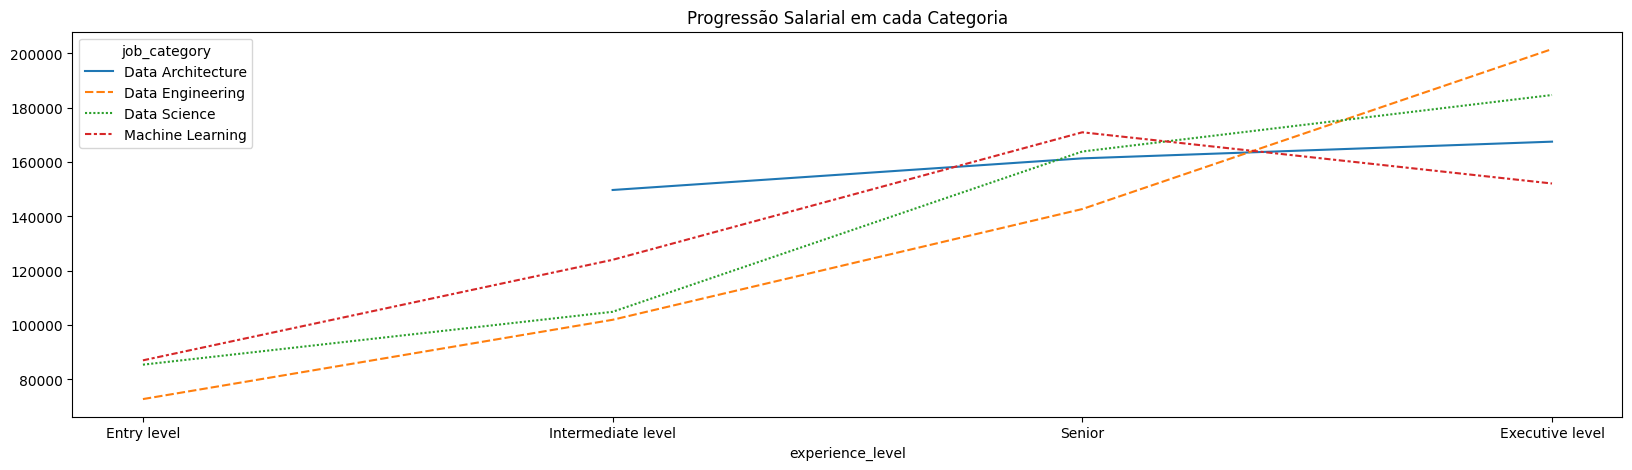

In [ ]:
df_temp = df[df['job_category'] != 'Other'].groupby(['job_category','experience_level']).agg('mean', numeric_only=True).unstack()['salary_in_usd'].T.reindex(['Entry level', 'Intermediate level', 'Senior', 'Executive level'])
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(data=df_temp)
plt.title('Progressão Salarial em cada Categoria')
plt.show()

In [ ]:
no_india = df[(df['job_category'] == 'Machine Learning') & (df['experience_level'] == 'Executive level') & (df['employee_residence'] != 'IN')]['salary_in_usd'].mean()
india = df[(df['job_category'] == 'Machine Learning') & (df['experience_level'] == 'Executive level') & (df['employee_residence'] == 'IN')]['salary_in_usd'].mean()

print(f'Os salários médios para cargos executivos em Machine Learning são {india} para Ìndia e {no_india} para os demais países.')

Os salários médios para cargos executivos em Machine Learning são 76309.0 para Ìndia e 190000.0 para os demais países.


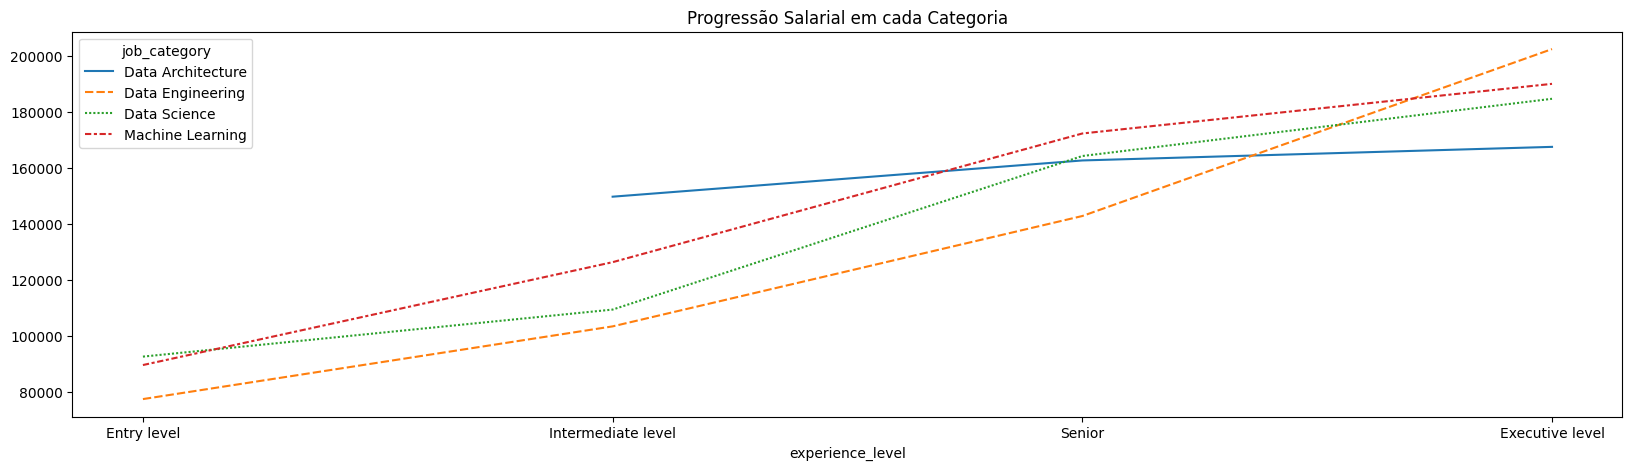

In [ ]:
df_temp = df[(df['job_category'] != 'Other') & (df['employee_residence'] != 'IN')].groupby(['job_category','experience_level']).agg('mean', numeric_only=True).unstack()['salary_in_usd'].T.reindex(['Entry level', 'Intermediate level', 'Senior', 'Executive level'])
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(data=df_temp)
plt.title('Progressão Salarial em cada Categoria')
plt.show()

## Quantos trabalhadores por nível de EXPERIÊNCIA para cada CATEGORIA?

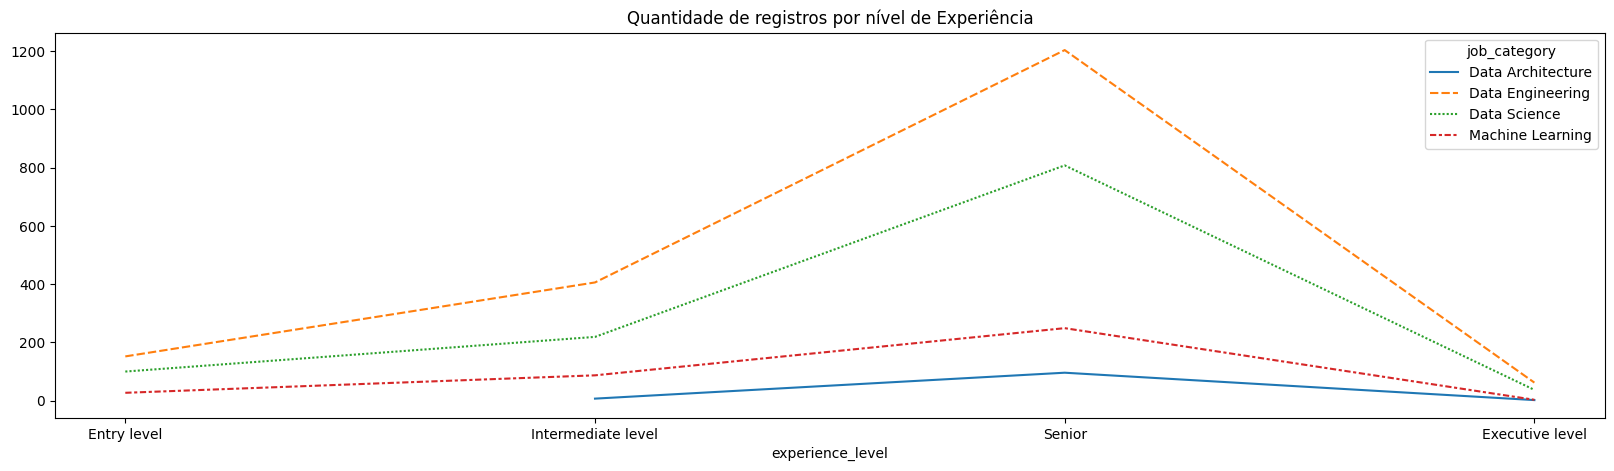

In [ ]:
df_temp = df[df['job_category'] != 'Other'].groupby(['job_category','experience_level']).agg('count').unstack()['salary_in_usd'].T.reindex(['Entry level', 'Intermediate level', 'Senior', 'Executive level'])
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(data=df_temp)
plt.title('Quantidade de registros por nível de Experiência')
plt.show()

## O PORTE da companhia influencia no SALÁRIO recebido?

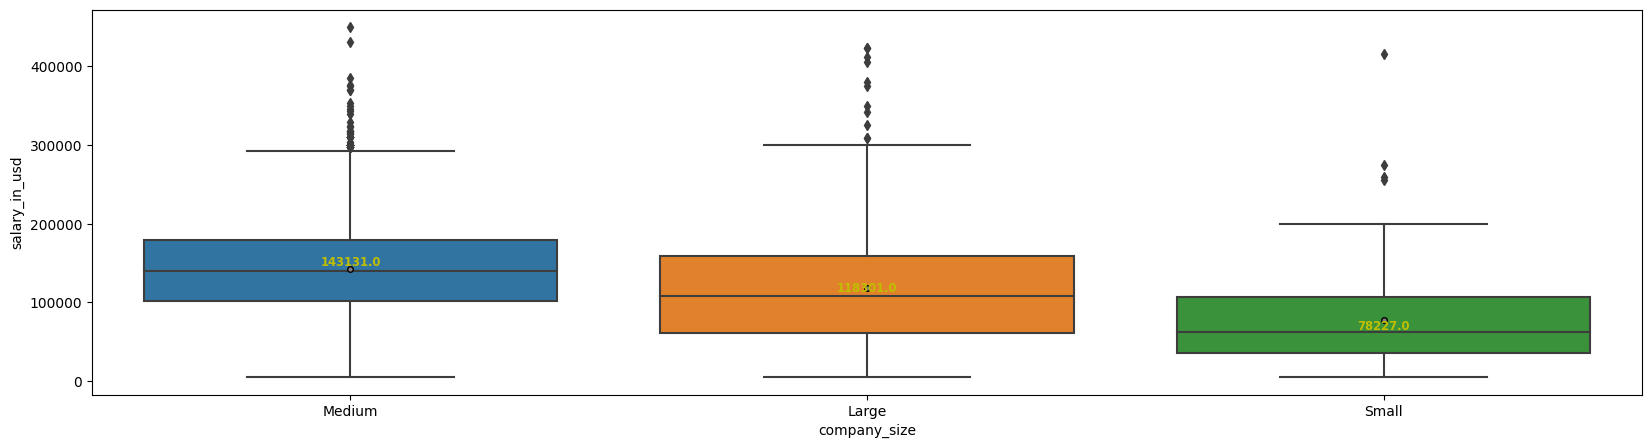

In [ ]:
feature = 'salary_in_usd'
feature2 = 'company_size'
hue = 'experience_level'

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(data=df, x=feature2, y=feature, order=df.groupby(feature2)[feature].agg('mean').sort_values(ascending=False).index,showmeans=True,
                 meanprops={
                      "marker":"o",
                      "markerfacecolor":"gray",
                      "markeredgecolor":"black",
                      "markersize":"4"
                      })

means = df.groupby(feature2)[feature].agg('mean').sort_values(ascending=False)
median = df.groupby(feature2)[feature].agg('median').sort_values(ascending=False)

for xtick in ax.get_xticks():
    ax.text(xtick,median[xtick]+(median[xtick]*0.05),round(means[xtick],0),
            horizontalalignment='center',size='small',color='y',weight='bold')
plt.show()

A média salarial em empresas de pequeno porte é menor, também é possível identificar que existem distorções na progressão salarial entre os cargos (Junior-Intermediario).

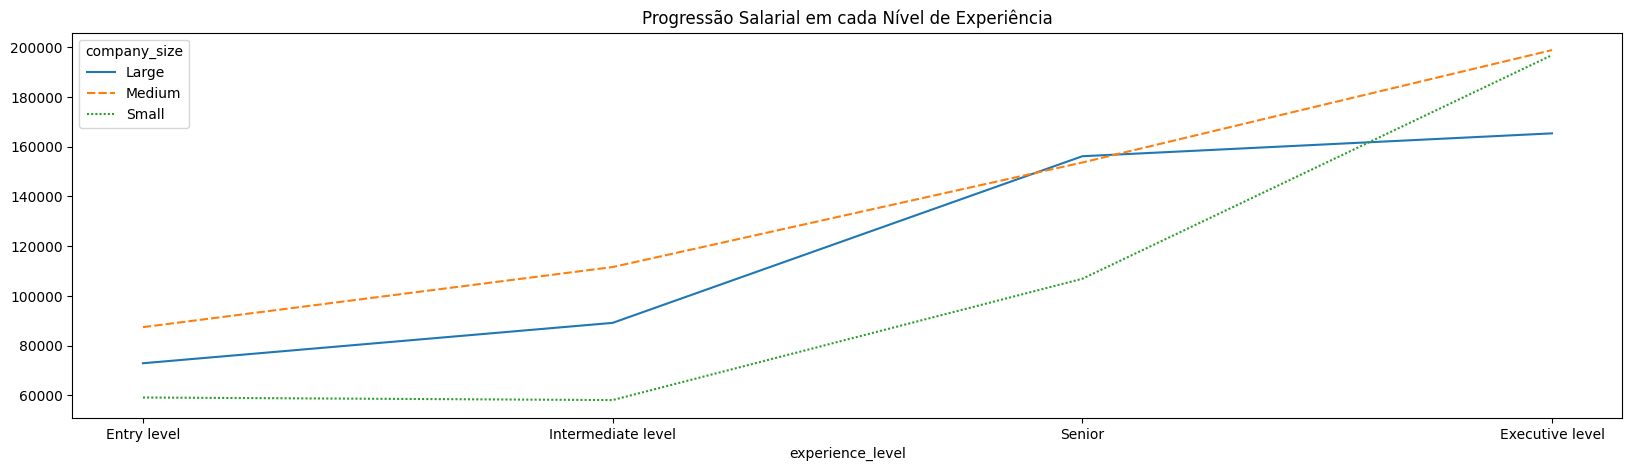

In [ ]:
df_temp = df.groupby(['company_size','experience_level']).agg('mean', numeric_only=True).unstack()['salary_in_usd'].T.reindex(['Entry level', 'Intermediate level', 'Senior', 'Executive level'])
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.lineplot(data=df_temp)
plt.title('Progressão Salarial em cada Nível de Experiência')
plt.show()

A média salarial entre as companhias de diferentes portes também é distorcida pelas diferentes proporções de profissionais com níveis de experiência mais elevados. Nível médio possui 71.8% de trabalhadores "senior" e 45% nas grandes e 29% nas pequenas.

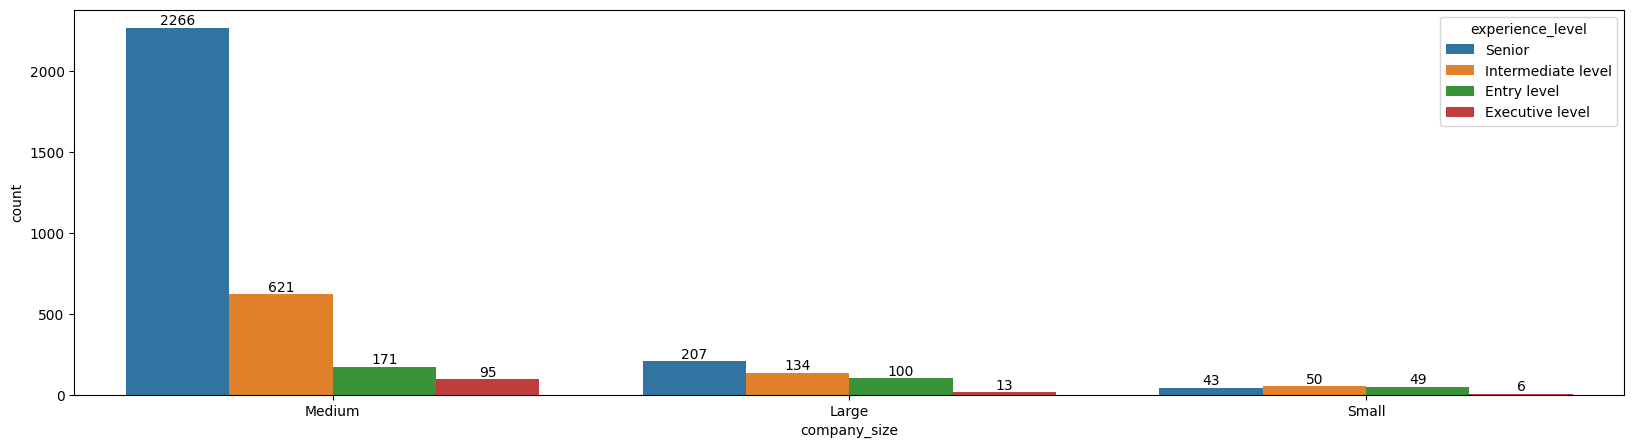

In [ ]:
feature = 'company_size'
hue='experience_level'

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x=feature, data=df, hue=hue, order=df[feature].value_counts().index)

for a in ax.containers:
  ax.bar_label(a)

plt.show()

## Há diferença SALARIAL em diferentes proporções de TRABALHO REMOTO?

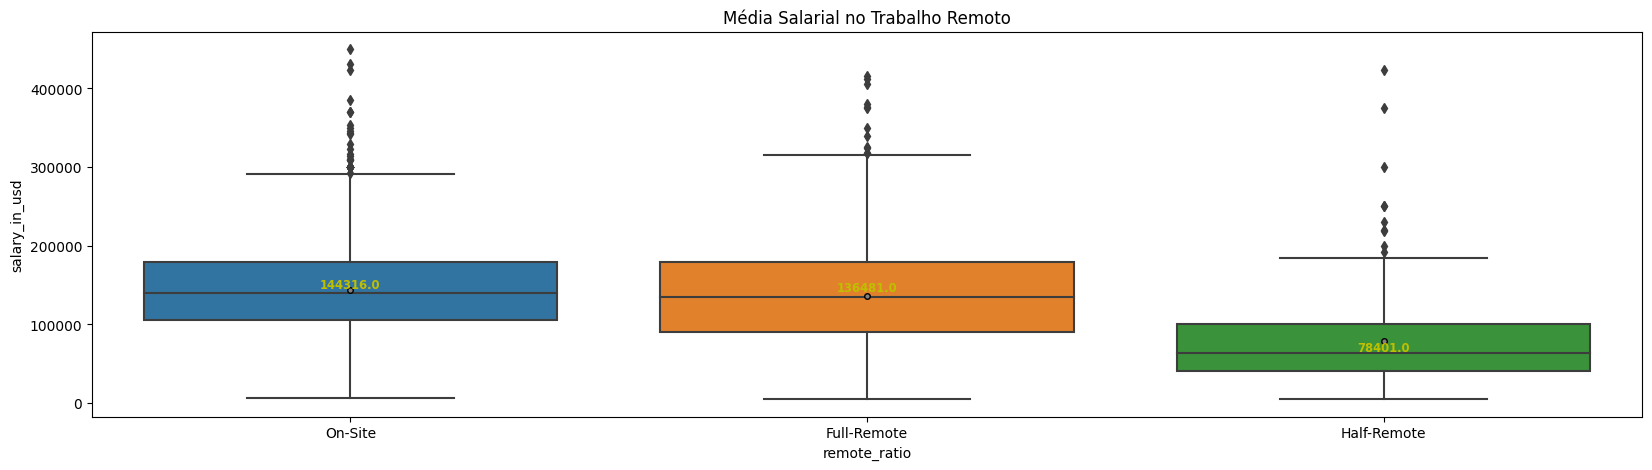

In [ ]:
feature = 'salary_in_usd'
feature2 = 'remote_ratio'

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(data=df, x=feature2, y=feature, order=df.groupby(feature2)[feature].agg('mean').sort_values(ascending=False).index,showmeans=True,
                 meanprops={
                      "marker":"o",
                      "markerfacecolor":"gray",
                      "markeredgecolor":"black",
                      "markersize":"4"
                      })

means = df.groupby(feature2)[feature].agg('mean').sort_values(ascending=False)
median = df.groupby(feature2)[feature].agg('median').sort_values(ascending=False)

for xtick in ax.get_xticks():
    ax.text(xtick,median[xtick]+(median[xtick]*0.05),round(means[xtick],0),
            horizontalalignment='center',size='small',color='y',weight='bold')
plt.title('Média Salarial no Trabalho Remoto')
plt.show()

Companhias nos EUA pagam salário médio maior, sendo que sua proporção no trabalho semi-presencial é menor em relação às demais modalidades. Portanto a presença de companhias fora dos EUA com salários menores distorcem a média dos trabalhadores semi-presenciais.

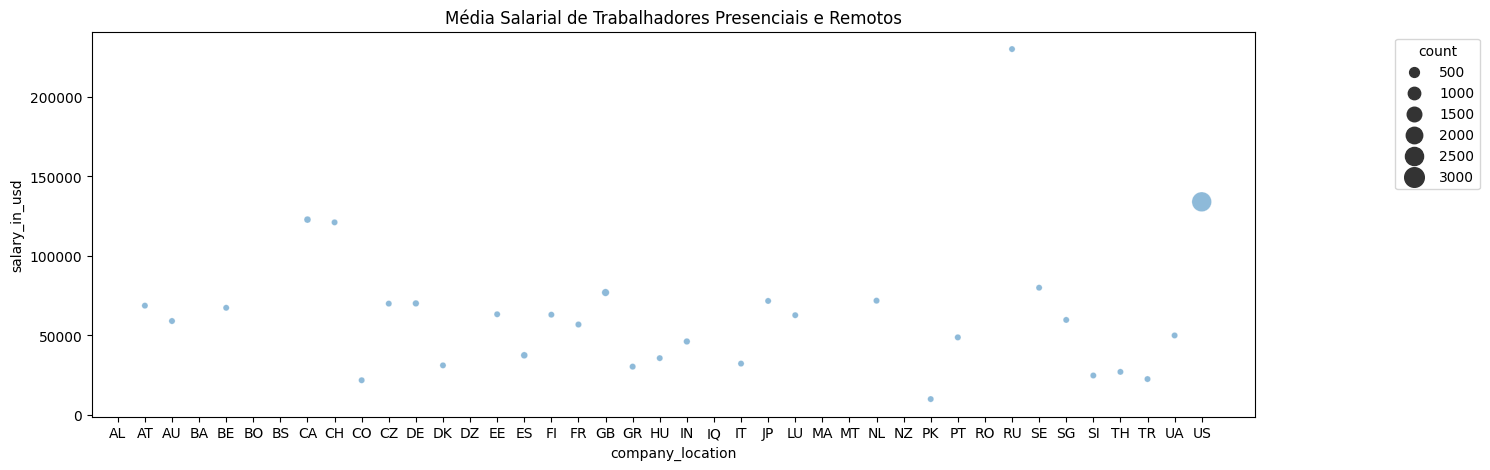

In [ ]:
size = df[(df['remote_ratio']=='On-Site') | (df['remote_ratio']=='Full-Remote')].groupby('company_location').agg('count')
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df[df['remote_ratio']=='Half-Remote'].groupby('company_location').agg('mean', numeric_only=True), x='company_location', y='salary_in_usd', size=size['salary_in_usd'], sizes=(20, 200), alpha=0.5)
plt.legend(title='count', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Média Salarial de Trabalhadores Presenciais e Remotos')
plt.show()

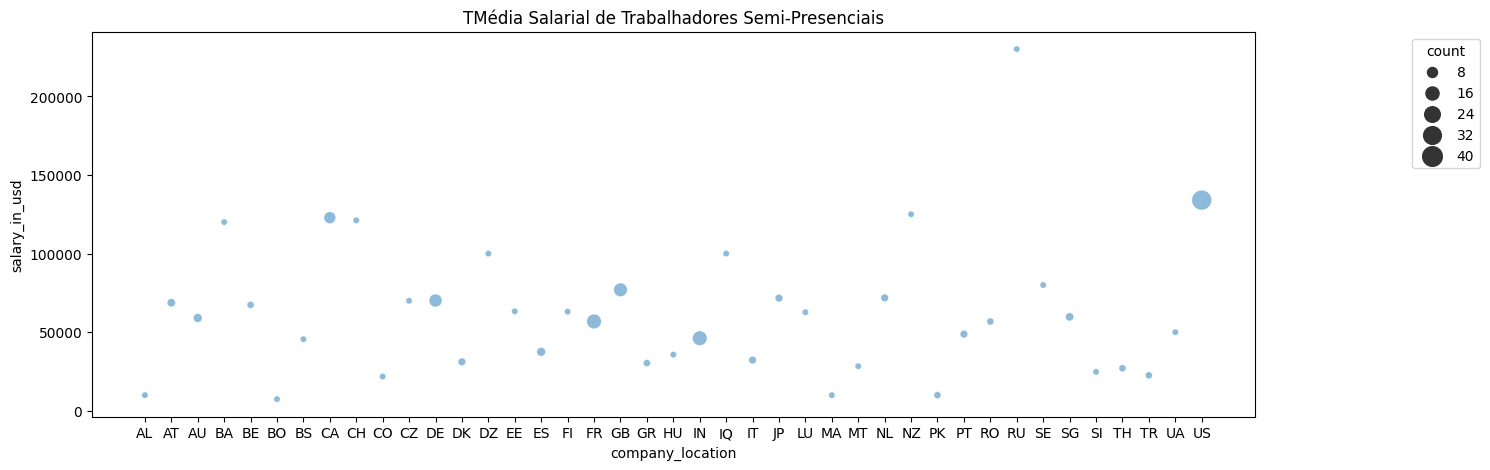

In [ ]:
size = df[df['remote_ratio']=='Half-Remote'].groupby('company_location').agg('count')
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df[df['remote_ratio']=='Half-Remote'].groupby('company_location').agg('mean', numeric_only=True), x='company_location', y='salary_in_usd', size=size['salary_in_usd'], sizes=(20, 200), alpha=0.5)
plt.legend(title='count', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('TMédia Salarial de Trabalhadores Semi-Presenciais')
plt.show()

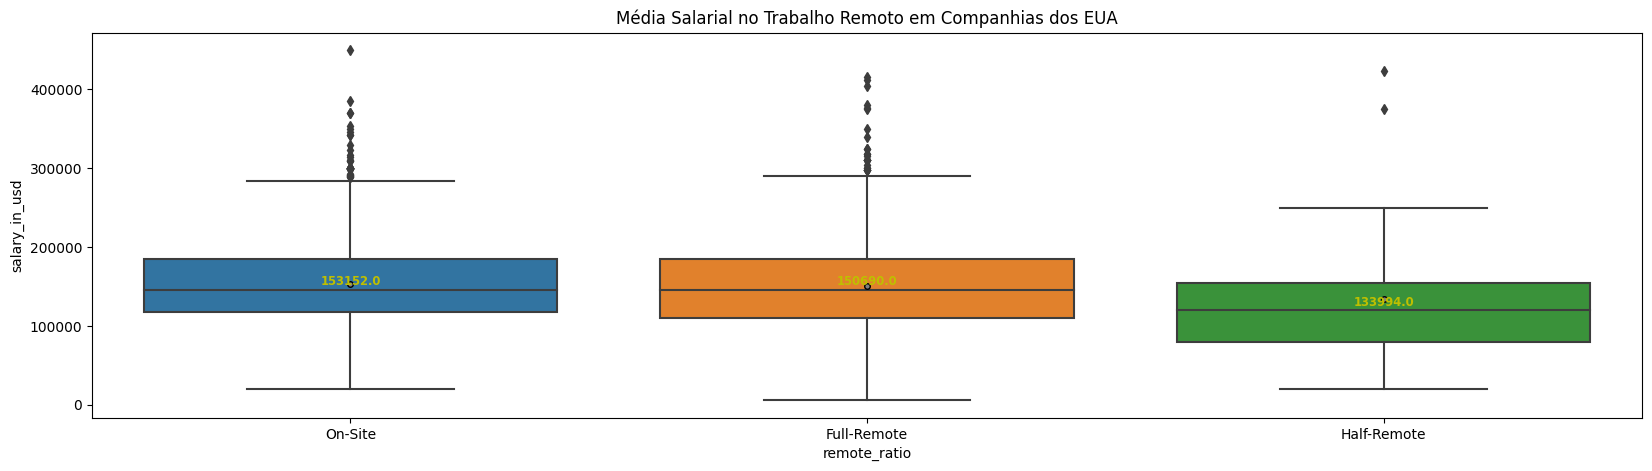

In [ ]:
df_us = df[df['company_location']=='US'].copy().reset_index(drop=True)

feature = 'salary_in_usd'
feature2 = 'remote_ratio'

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(data=df_us, x=feature2, y=feature, order=df_us.groupby(feature2)[feature].agg('mean').sort_values(ascending=False).index,showmeans=True,
                 meanprops={
                      "marker":"o",
                      "markerfacecolor":"gray",
                      "markeredgecolor":"black",
                      "markersize":"4"
                      })

means = df_us.groupby(feature2)[feature].agg('mean').sort_values(ascending=False)
median = df_us.groupby(feature2)[feature].agg('median').sort_values(ascending=False)

for xtick in ax.get_xticks():
    ax.text(xtick,median[xtick]+(median[xtick]*0.05),round(means[xtick],0),
            horizontalalignment='center',size='small',color='y',weight='bold')
plt.title('Média Salarial no Trabalho Remoto em Companhias dos EUA')
plt.show()

## A proporção de TRABALHO REMOTO foi se alterando com o passar dos ANOS?

A proporção de trabalhadores na modalidade presencial se acentuou em 2022, em 2023 superou a quantidade de trabalhadores remotos. Uma explicação seria o retorno gradual aos escritórios realizados pelas cias com o relaxamento das medidas de proteção na pandemia de COVID19.

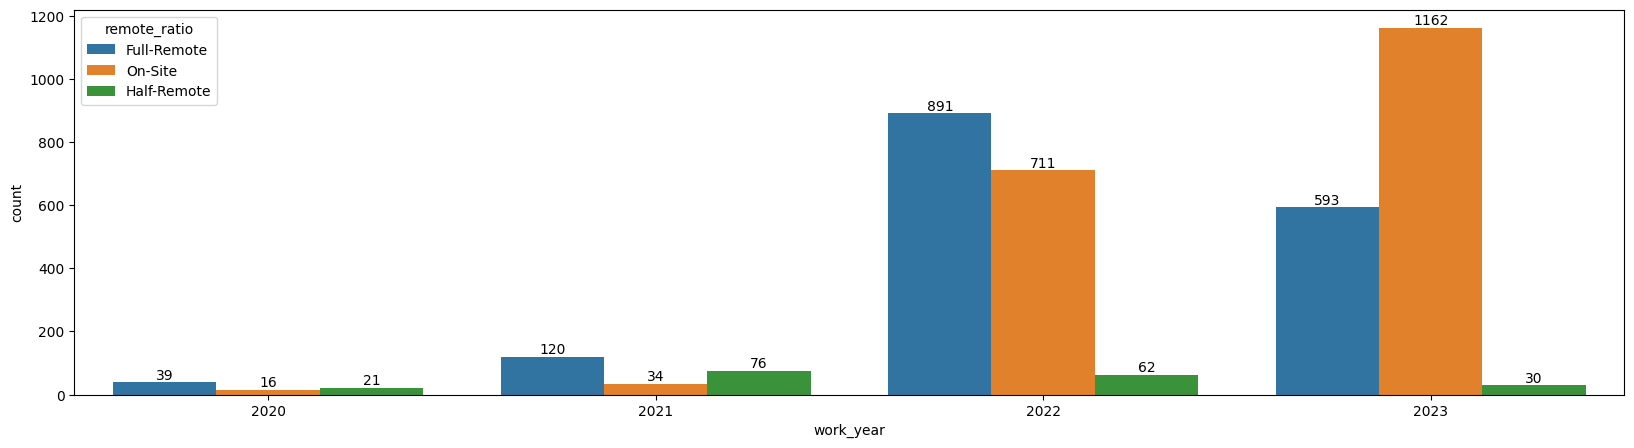

In [ ]:
feature = 'work_year'
hue='remote_ratio'

fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x=feature, data=df, hue=hue)

for a in ax.containers:
  ax.bar_label(a)

plt.show()

# ANÁLISE GEOESPACIAL

Conforme apresentado anteriormente cerca de 85% dos registros são de companhias localizadas nos EUA, dessa forma os dados a serem apresentados podem sofrer distorções dado tamanho reduzido da amostra para os demais países.

## PROFISSIONAIS DE QUAIS PAÍSES possuem os maiores salários?

Salários nos EUA tendem a ser maiores na média. Porto Rico (PR), Israel (IL) e Malasya (MY) possuem salários médios maiores no entanto possuem poucos registros o que pode indicar concentração em algum nível de experiência ("Senior" com valores mais altos).

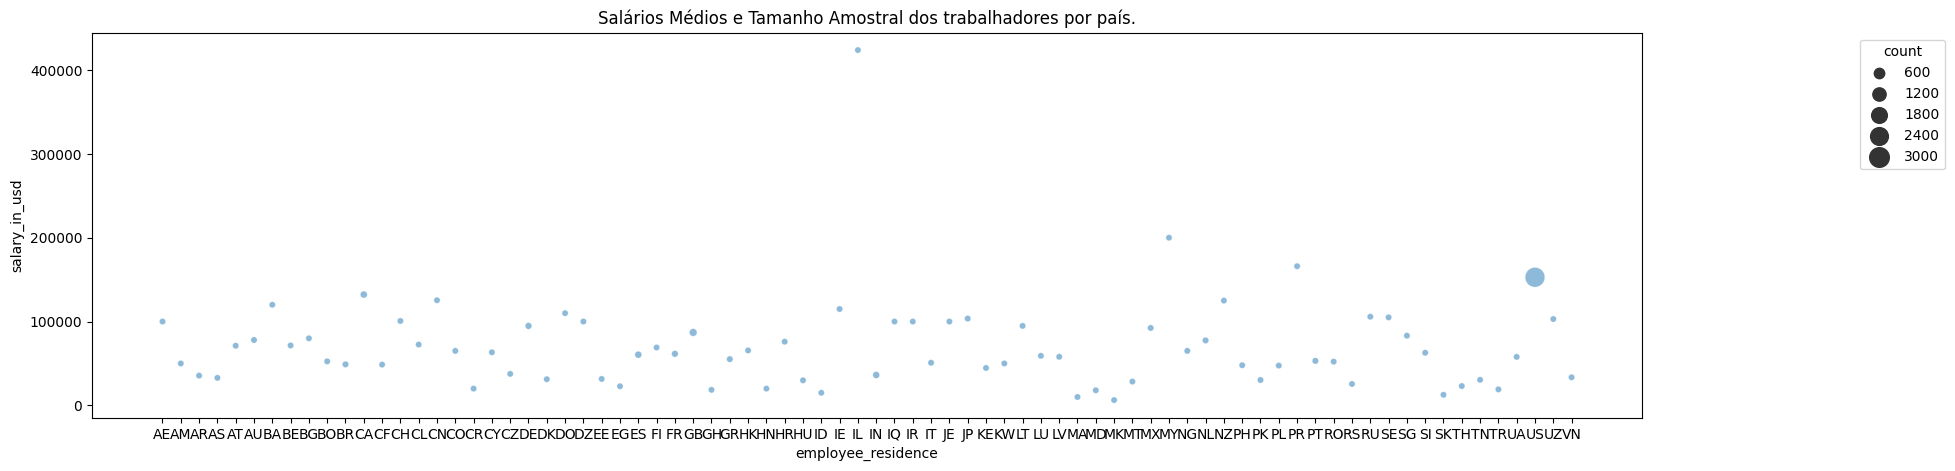

In [ ]:
size = df.groupby('employee_residence').agg('count').sort_values(by=['salary_in_usd'],ascending=False)
plt.figure(figsize=(20, 5))
sns.scatterplot(data=df.groupby('employee_residence').agg('mean', numeric_only=True), x='employee_residence', y='salary_in_usd', size=size['salary_in_usd'], sizes=(20, 200), alpha=0.5)
plt.legend(title='count', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Salários Médios e Tamanho Amostral dos trabalhadores por país.')
plt.show()

In [ ]:
df[df['employee_residence'].isin(['PR','MY', 'IL'])].groupby(['employee_residence', 'experience_level']).agg('count')['salary_in_usd']

employee_residence  experience_level
IL                  Senior              1
MY                  Senior              1
PR                  Senior              5
Name: salary_in_usd, dtype: int64

In [ ]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence_code'] = country

residence = df.groupby(['employee_residence_code']).agg('mean', numeric_only=True)
fig = px.choropleth(locations = residence.index,
                    color = residence['salary_in_usd'].values,
                    title = 'Employee Loaction On Map')
fig.show()

## EMPRESAS DE QUAIS PAÍSES possuem os maiores SALÁRIOS?

Salários nos EUA tendem a ser maiores na média. Porto Rico (PR) e Israel (IL) possuem salários médios maiores no entanto possuem poucos registros. Indicando que podem haver por exemplo outliers ou concentração em algum cargo específico.

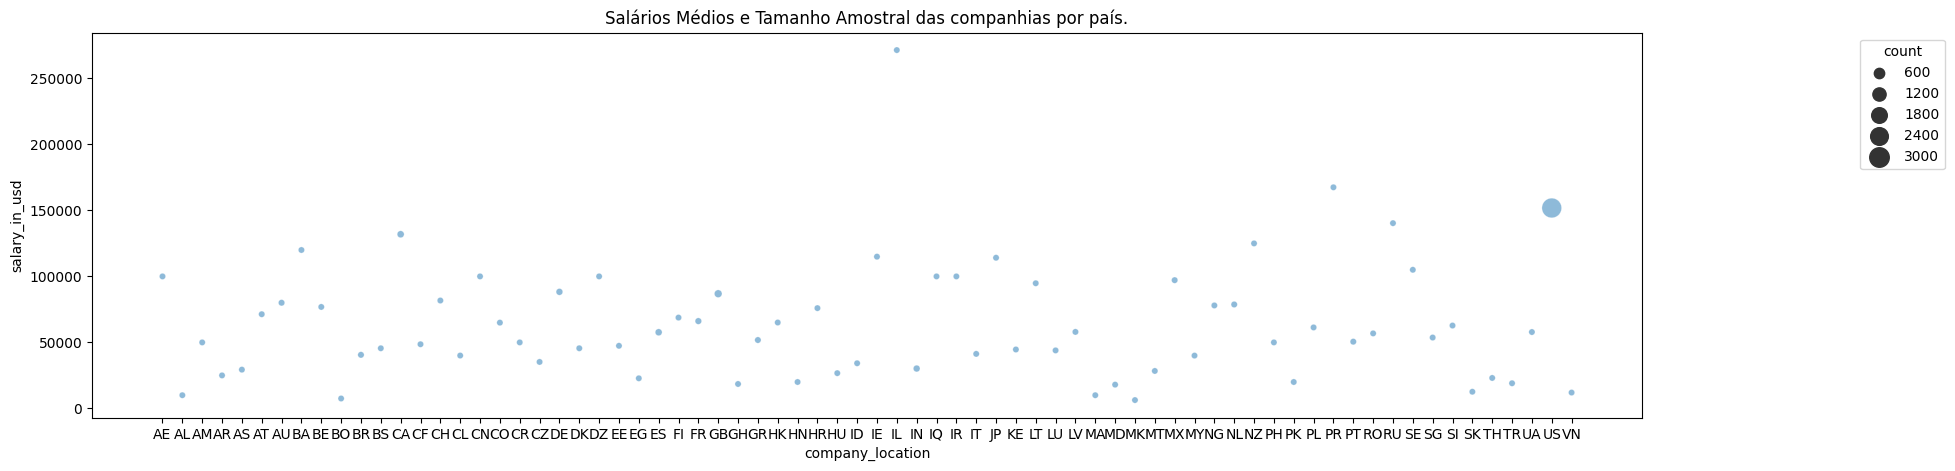

In [ ]:
size = df.groupby('company_location').agg('count').sort_values(by=['salary_in_usd'],ascending=False)
plt.figure(figsize=(20, 5))
sns.scatterplot(data=df.groupby('company_location').agg('mean', numeric_only=True), x='company_location', y='salary_in_usd', size=size['salary_in_usd'], sizes=(20, 200), alpha=0.5)
plt.legend(title='count', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Salários Médios e Tamanho Amostral das companhias por país.')
plt.show()

In [ ]:
df[df['company_location'].isin(['PR', 'IL'])].groupby(['company_location', 'experience_level']).agg('count')['salary_in_usd']

company_location  experience_level  
IL                Intermediate level    1
                  Senior                1
PR                Senior                4
Name: salary_in_usd, dtype: int64

In [ ]:
country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location_code'] = country

residence = df.groupby(['company_location_code']).agg('mean', numeric_only=True)
fig = px.choropleth(locations = residence.index,
                    color = residence['salary_in_usd'].values,
                    title = 'Salários Médios das empresas pelo mundo.')
fig.show()

## Companhias de quais PAÍSES possuem mais colaboradores que residem em outros países?

In [ ]:
df_remote = df[df['company_location_code'] != df['employee_residence_code']].copy()

residence = df_remote.groupby(['company_location_code']).agg('count')
fig = px.choropleth(locations = residence.index,
                    color = residence['salary_in_usd'].values,
                    title = 'Quantidade de trabalhadores não residentes em cada país.')
fig.show()

## Quais PAÍSES possuem mais trabalhadores completamente REMOTOS?

In [ ]:
df_remote = df[df['remote_ratio'] == 'Full-Remote'].copy()

residence = df_remote.groupby(['company_location_code']).agg('count')
fig = px.choropleth(locations = residence.index,
                    color = residence['salary_in_usd'].values,
                    title = 'Company Location On Map')
fig.show()

# CONCLUSÃO

Relacionando salário médio com as features encontramos os seguintes conclusões:

*   A categoria com maior salário é Data Architecture, porém esta não possuem registros em cargos de entrada (que possuem salários menores).
*  Data Science apresenta os melhores salários iniciais e melhor progressão salarial no contexto global. Retirando trabalhadores da Índia da análise, temos Machine Learning como primeira opção.
*   Apesar de Machine Learning oferecer os melhores salários, temos menos registros de oportunidades nesta àrea. Ficam em primeiro lugar Data Engineering, seguido por Data Science.
*   Companhias de pequeno porte pagam salários menores nas posições iniciais, porém ultrapassam os valores de grandes empresas nas posições executivas. Pode indicar a falta dos inputs salariais de executivos deste segmento ou o alto investimento das companias em dados para estes cargos chave.


*   Com a emergência global de COVID-19 e suas medidas de restrição, houve um aumento na proporção de trabalhadores completamente remotos, fato este que se inverteu em 2023 com a volta aos escritórios. Com relação aos salários é importante destacar que trabalho remoto tende a reduzir os montantes recebidos mesmo em países com salários mais homogêneos.
*   Os EUA apresentam melhores salários, mais trabalhadores remotos e residentes em outros países. Seus residentes também recebem os maiores salários na média. Alguns países possuem salários maiores, porém podem ser entendidos como outliers dado número reduzido de registros (0.001% da amostra.)

A presente análise evidencia o impacto das categorias de atuação, porte e região geográfica sobre os salários. Entendendo estes padrões, recrutadores e  profissionais em busca de oportunidades podem tomar decisões mais assertivas em suas estratégias.

Com relação à amostra, vale ressaltar que ela possui dados concentrados em valores específicos como região geográfica, cargos, níveis de experiência o que pode indicar deficiências na coleta de dados.



